Modelling

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#import dataset
df = pd.read_csv("/content/balanced_dataset_blibli.csv")
df.head()

,Ulasan,Compound_Score,Sentiments
0,I've already submitted to Paylater when I use ...,-0.7506,Negatif
1,"the application is ugly, expensive, not like a...",-0.6149,Negatif
2,where the tacky ads are really annoying,-0.4576,Negatif
3,help with money,0.4019,Positif
4,download blibli x nct,0.0000,Netral


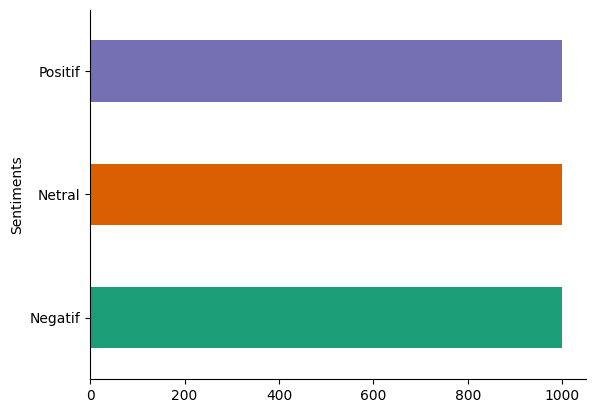

In [ ]:
# @title Sentiments

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sentiments').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Klasifikasi Rf dengan TF-IDF

RASIO PENGUJIAN
90:10
80:20
70:30
60:40
50:50
40:60
30:70
20:80
10:90

**RASIO 90:10**

Random Forest Accuracy: 0.8566666666666667
Random Forest Precision: 0.8582187579428959
Random Forest Recall: 0.8566666666666667
Random Forest F1 Score: 0.856052024381886
Confusion Matrix for Random Forest:
[[98 10  6]
 [ 7 93  2]
 [11  7 66]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.84      0.86      0.85       114
      Netral       0.85      0.91      0.88       102
     Positif       0.89      0.79      0.84        84

    accuracy                           0.86       300
   macro avg       0.86      0.85      0.85       300
weighted avg       0.86      0.86      0.86       300



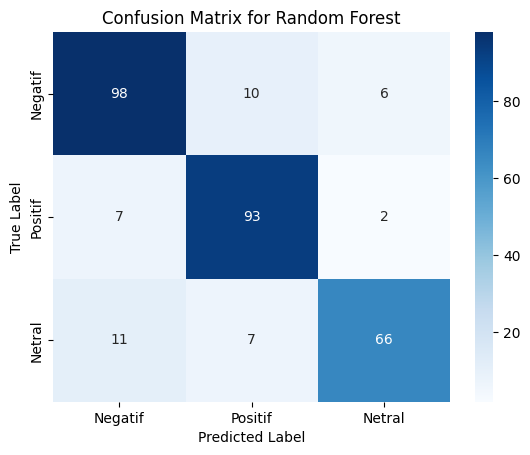

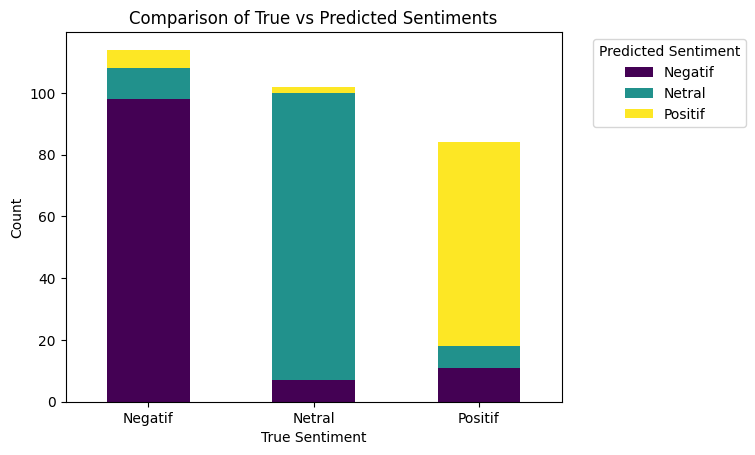

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (90:10)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.10,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 80:20**

Random Forest Accuracy: 0.845
Random Forest Precision: 0.849189430698317
Random Forest Recall: 0.845
Random Forest F1 Score: 0.8443046739712183
Confusion Matrix for Random Forest:
[[170  17   8]
 [ 13 188   8]
 [ 28  19 149]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.81      0.87      0.84       195
      Netral       0.84      0.90      0.87       209
     Positif       0.90      0.76      0.83       196

    accuracy                           0.84       600
   macro avg       0.85      0.84      0.84       600
weighted avg       0.85      0.84      0.84       600



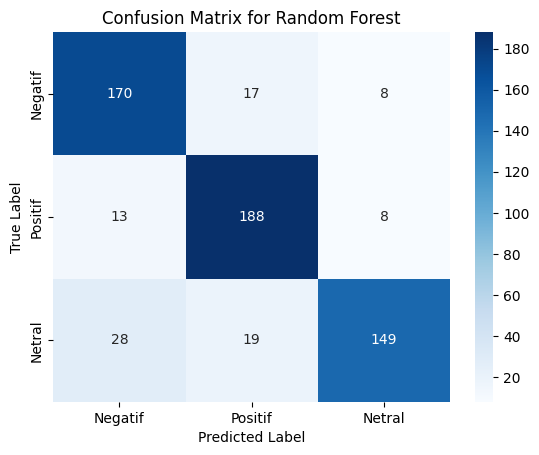

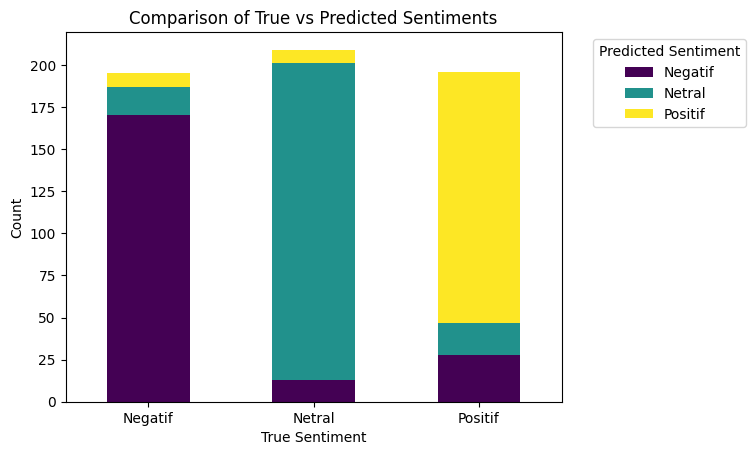

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.20,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 70:30**

Random Forest Accuracy: 0.8411111111111111
Random Forest Precision: 0.8504876864711933
Random Forest Recall: 0.8411111111111111
Random Forest F1 Score: 0.8413378746614987
Confusion Matrix for Random Forest:
[[249  28  10]
 [ 26 267   5]
 [ 45  29 241]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.78      0.87      0.82       287
      Netral       0.82      0.90      0.86       298
     Positif       0.94      0.77      0.84       315

    accuracy                           0.84       900
   macro avg       0.85      0.84      0.84       900
weighted avg       0.85      0.84      0.84       900



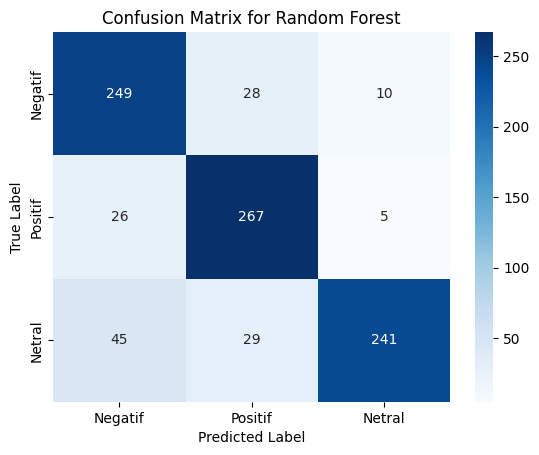

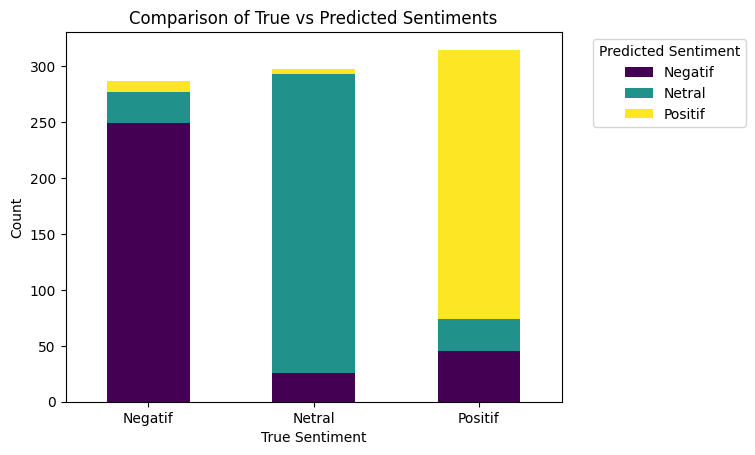

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (70:30)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.30,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 60:40**

Random Forest Accuracy: 0.8283333333333334
Random Forest Precision: 0.8363993470535281
Random Forest Recall: 0.8283333333333334
Random Forest F1 Score: 0.828582811677107
Confusion Matrix for Random Forest:
[[341  41  14]
 [ 36 334  14]
 [ 65  36 319]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.77      0.86      0.81       396
      Netral       0.81      0.87      0.84       384
     Positif       0.92      0.76      0.83       420

    accuracy                           0.83      1200
   macro avg       0.83      0.83      0.83      1200
weighted avg       0.84      0.83      0.83      1200



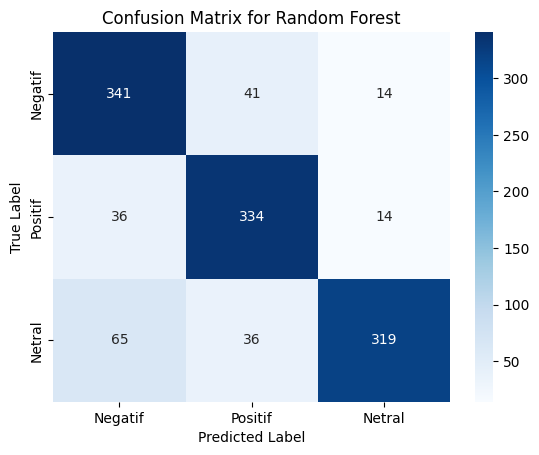

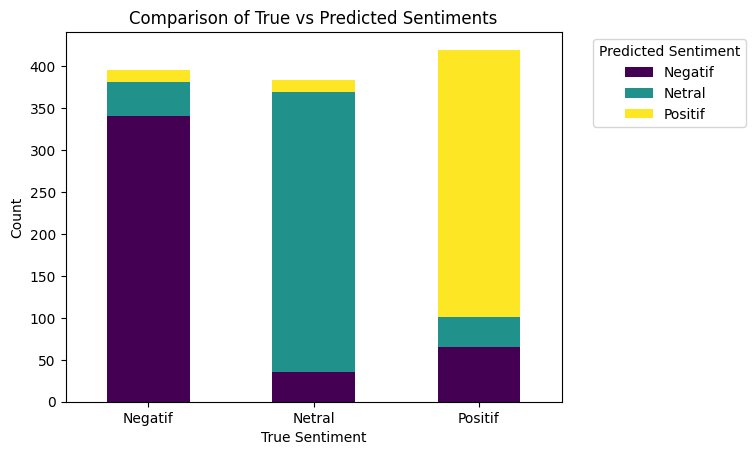

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (60:40)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.40,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 50:50**

Random Forest Accuracy: 0.8226666666666667
Random Forest Precision: 0.8313051266164648
Random Forest Recall: 0.8226666666666667
Random Forest F1 Score: 0.8226091051367476
Confusion Matrix for Random Forest:
[[424  55  18]
 [ 45 428  16]
 [ 77  55 382]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.78      0.85      0.81       497
      Netral       0.80      0.88      0.83       489
     Positif       0.92      0.74      0.82       514

    accuracy                           0.82      1500
   macro avg       0.83      0.82      0.82      1500
weighted avg       0.83      0.82      0.82      1500



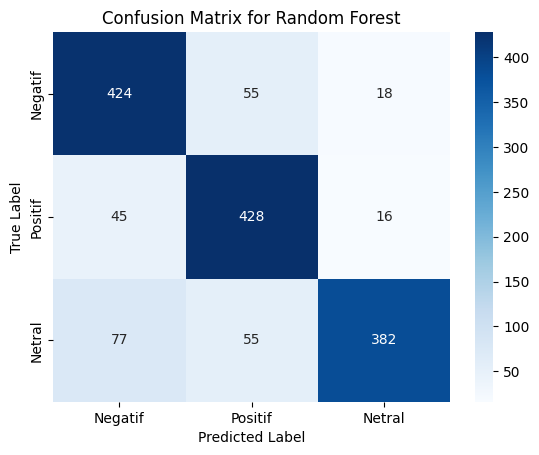

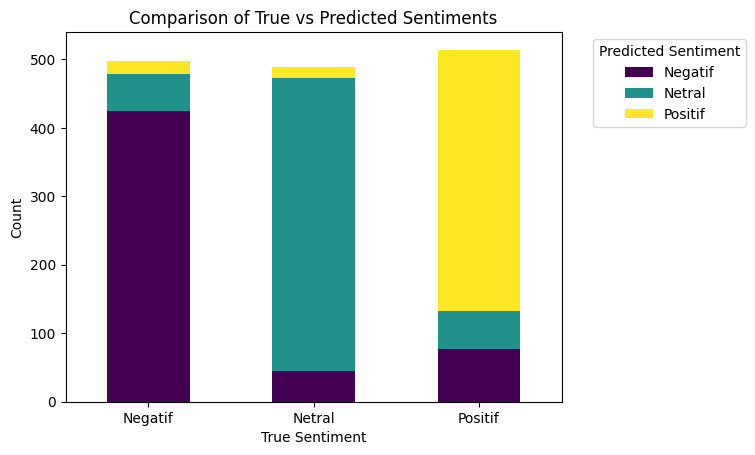

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (50:50)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.50,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 40:60**

Random Forest Accuracy: 0.8161111111111111
Random Forest Precision: 0.8272571622602407
Random Forest Recall: 0.8161111111111111
Random Forest F1 Score: 0.8160951042288086
Confusion Matrix for Random Forest:
[[509  81  19]
 [ 51 515  16]
 [ 87  77 445]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.79      0.84      0.81       609
      Netral       0.77      0.88      0.82       582
     Positif       0.93      0.73      0.82       609

    accuracy                           0.82      1800
   macro avg       0.83      0.82      0.82      1800
weighted avg       0.83      0.82      0.82      1800



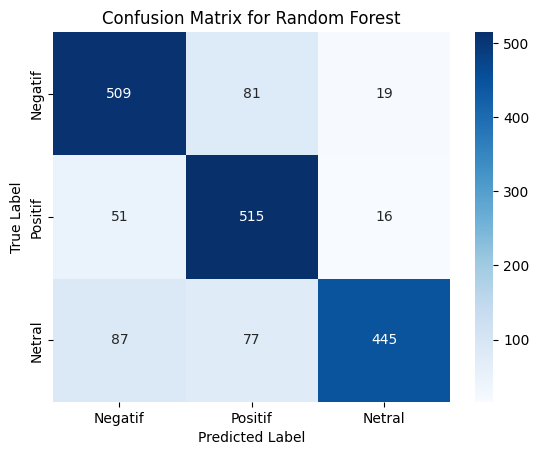

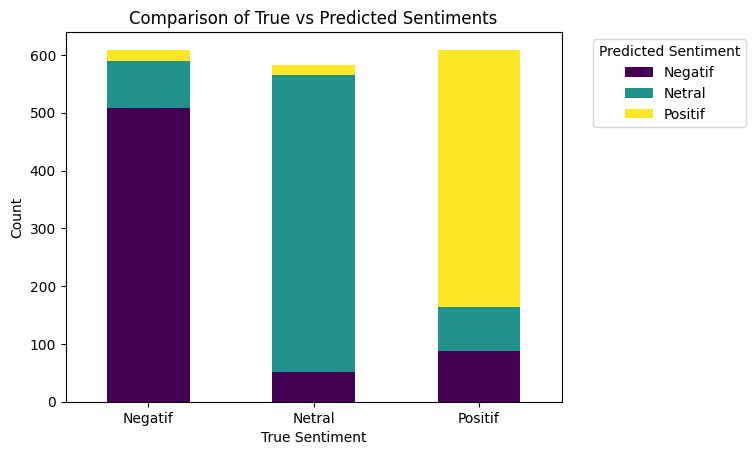

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (40:60)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.60,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 30:70**

Random Forest Accuracy: 0.8123809523809524
Random Forest Precision: 0.8254096707670747
Random Forest Recall: 0.8123809523809524
Random Forest F1 Score: 0.8125025345525548
Confusion Matrix for Random Forest:
[[582 104  21]
 [ 59 610  16]
 [ 96  98 514]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.79      0.82      0.81       707
      Netral       0.75      0.89      0.81       685
     Positif       0.93      0.73      0.82       708

    accuracy                           0.81      2100
   macro avg       0.82      0.81      0.81      2100
weighted avg       0.83      0.81      0.81      2100



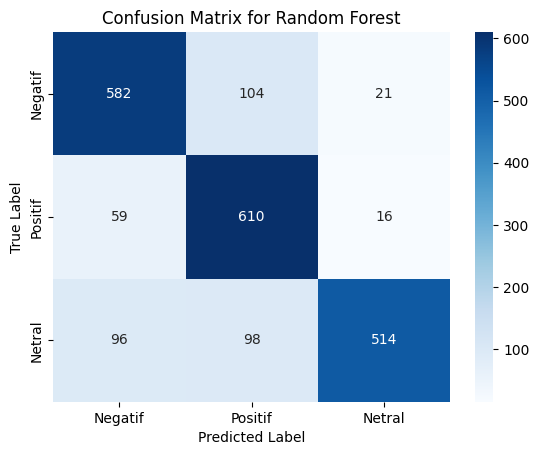

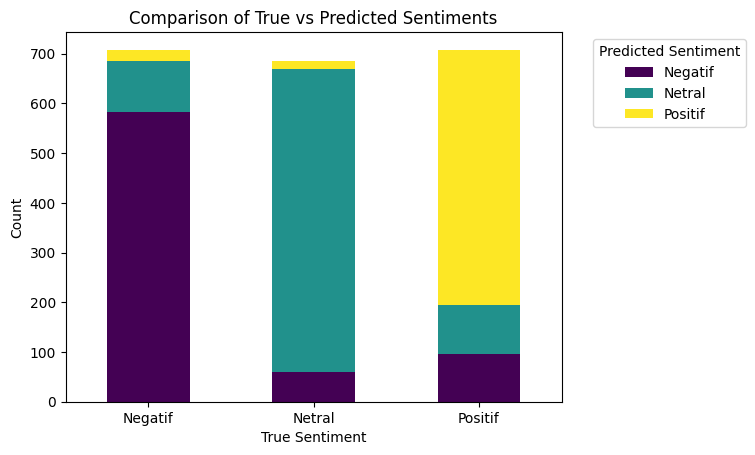

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (30:70)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.70,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 20:80**

Random Forest Accuracy: 0.7795833333333333
Random Forest Precision: 0.8022800846878889
Random Forest Recall: 0.7795833333333333
Random Forest F1 Score: 0.7799390246152859
Confusion Matrix for Random Forest:
[[610 165  19]
 [ 72 698  11]
 [143 119 563]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.74      0.77      0.75       794
      Netral       0.71      0.89      0.79       781
     Positif       0.95      0.68      0.79       825

    accuracy                           0.78      2400
   macro avg       0.80      0.78      0.78      2400
weighted avg       0.80      0.78      0.78      2400



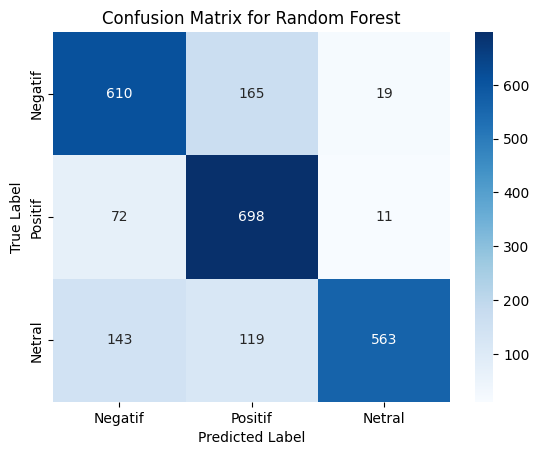

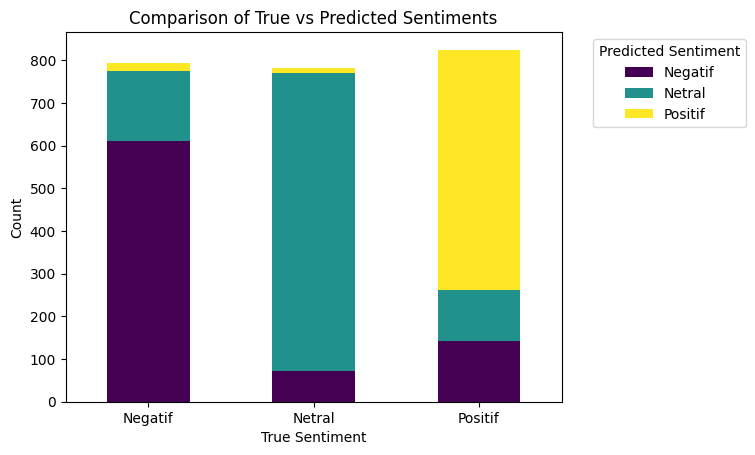

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (20:80)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.80,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 10:90**

Random Forest Accuracy: 0.727037037037037
Random Forest Precision: 0.7648774356422318
Random Forest Recall: 0.727037037037037
Random Forest F1 Score: 0.7264764089822909
Confusion Matrix for Random Forest:
[[558 301  31]
 [ 67 814   9]
 [143 186 591]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.73      0.63      0.67       890
      Netral       0.63      0.91      0.74       890
     Positif       0.94      0.64      0.76       920

    accuracy                           0.73      2700
   macro avg       0.76      0.73      0.73      2700
weighted avg       0.76      0.73      0.73      2700



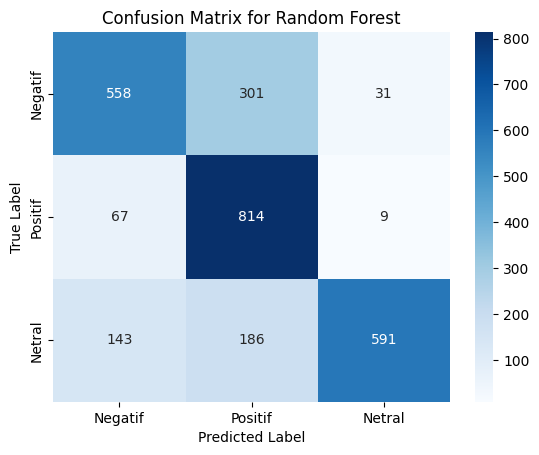

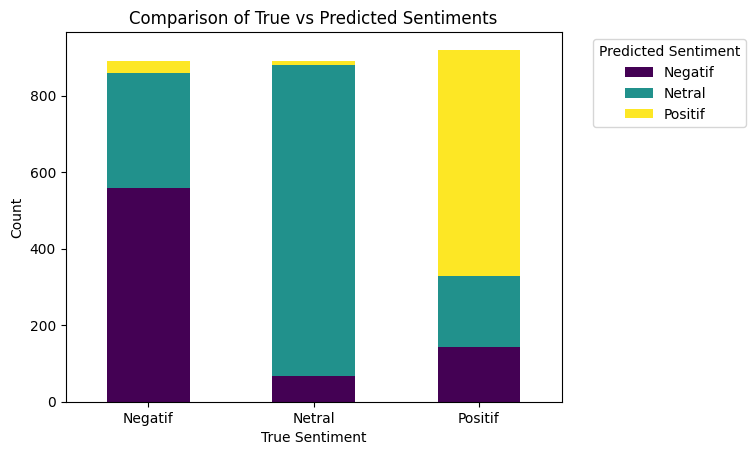

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (10:90)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.90,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**MENAMPILKAN JUMLAH SENTIMEN**

In [ ]:
# Menampilkan jumlah sentimen positif dan negatif
jumlah_sentimen = df['Sentiments'].value_counts()
print("Jumlah Sentimen Positif, Negatif dan Netral:")
print(jumlah_sentimen)

Jumlah Sentimen Positif, Negatif dan Netral:
Sentiments
Negatif    1000
Positif    1000
Netral     1000
Name: count, dtype: int64


**WORDCLOUD**

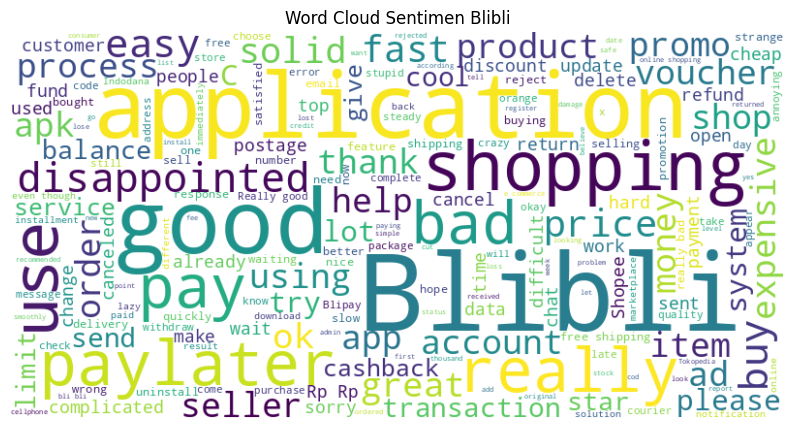

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fungsi untuk visualisasi word cloud
def plot_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title)
    plt.show()

# Contoh data untuk visualisasi word cloud
all_comments = ' '.join(df['Ulasan'])

# Visualisasi word cloud untuk komentar
plot_word_cloud(all_comments, 'Word Cloud Sentimen Blibli')

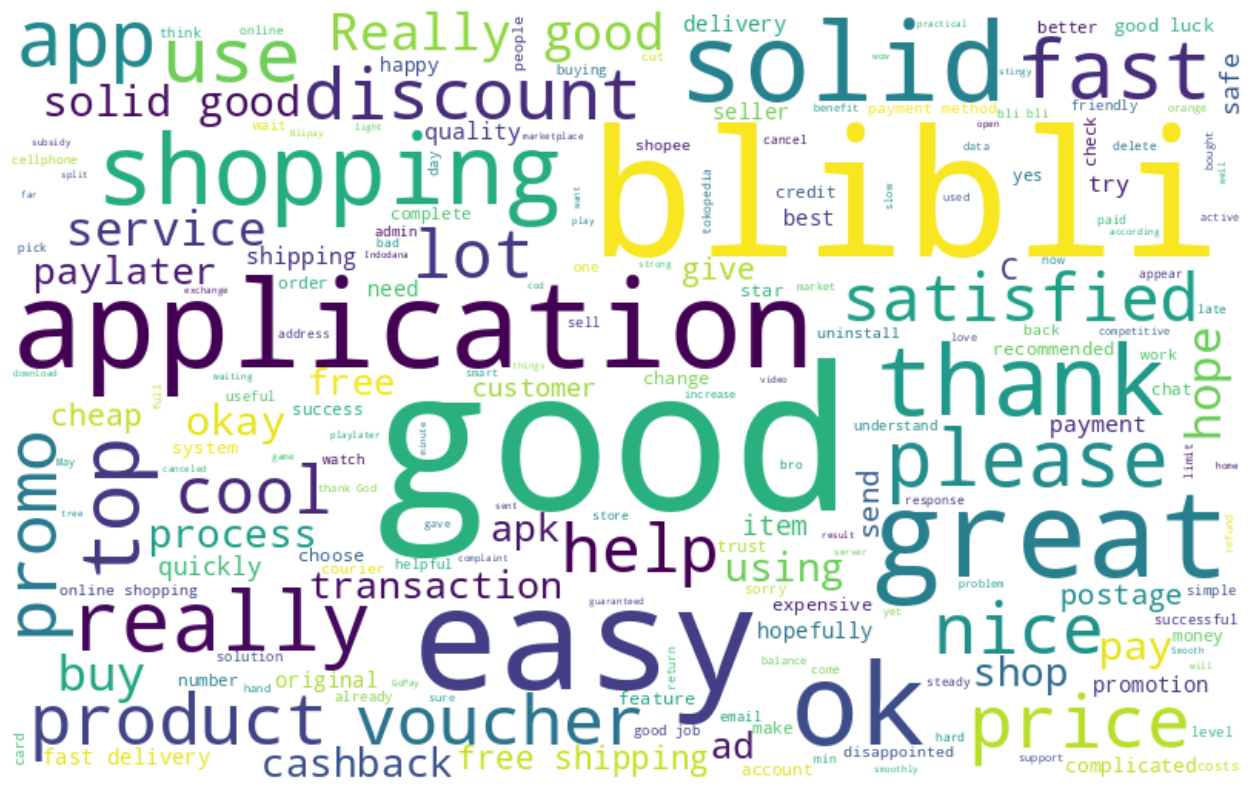

In [ ]:
df_p=df[df['Sentiments']== "Positif"]
all_words_lem = ' '.join([word for word in df_p['Ulasan']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

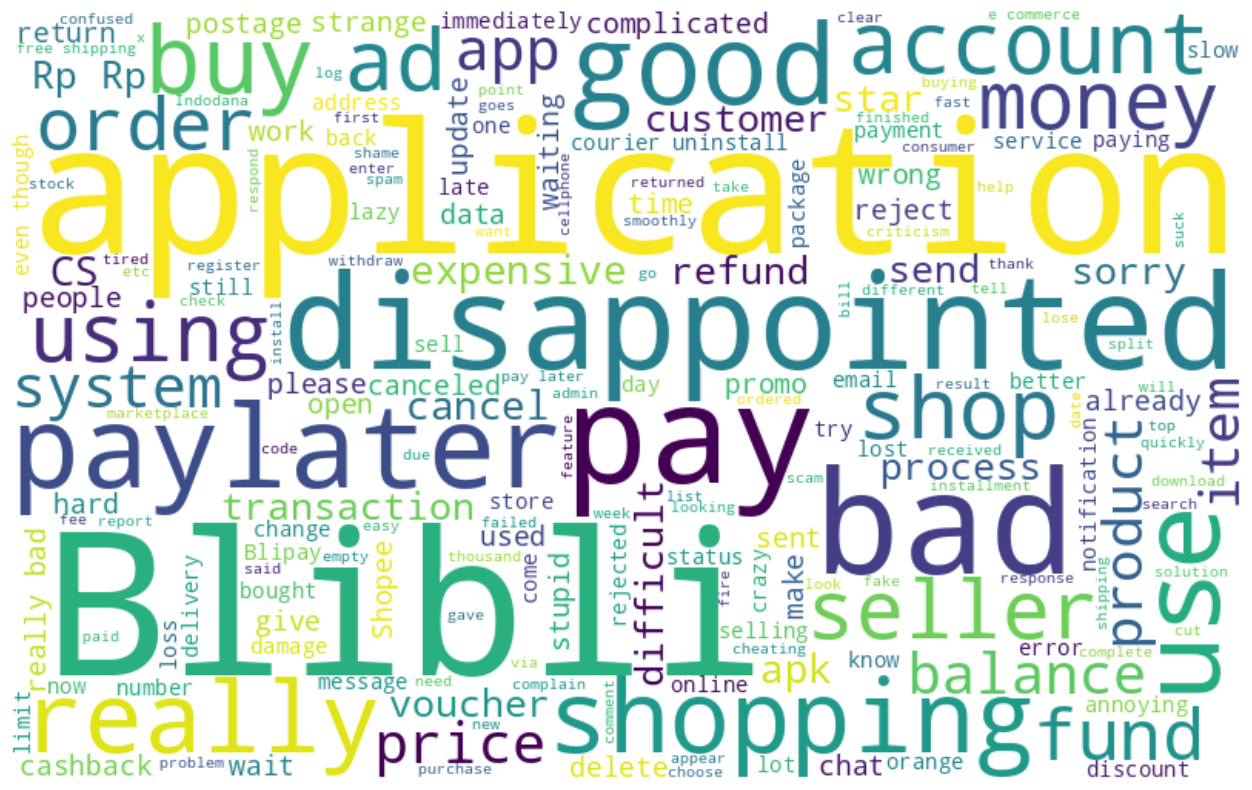

In [ ]:
df_p=df[df['Sentiments']== "Negatif"]
all_words_lem = ' '.join([word for word in df_p['Ulasan']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

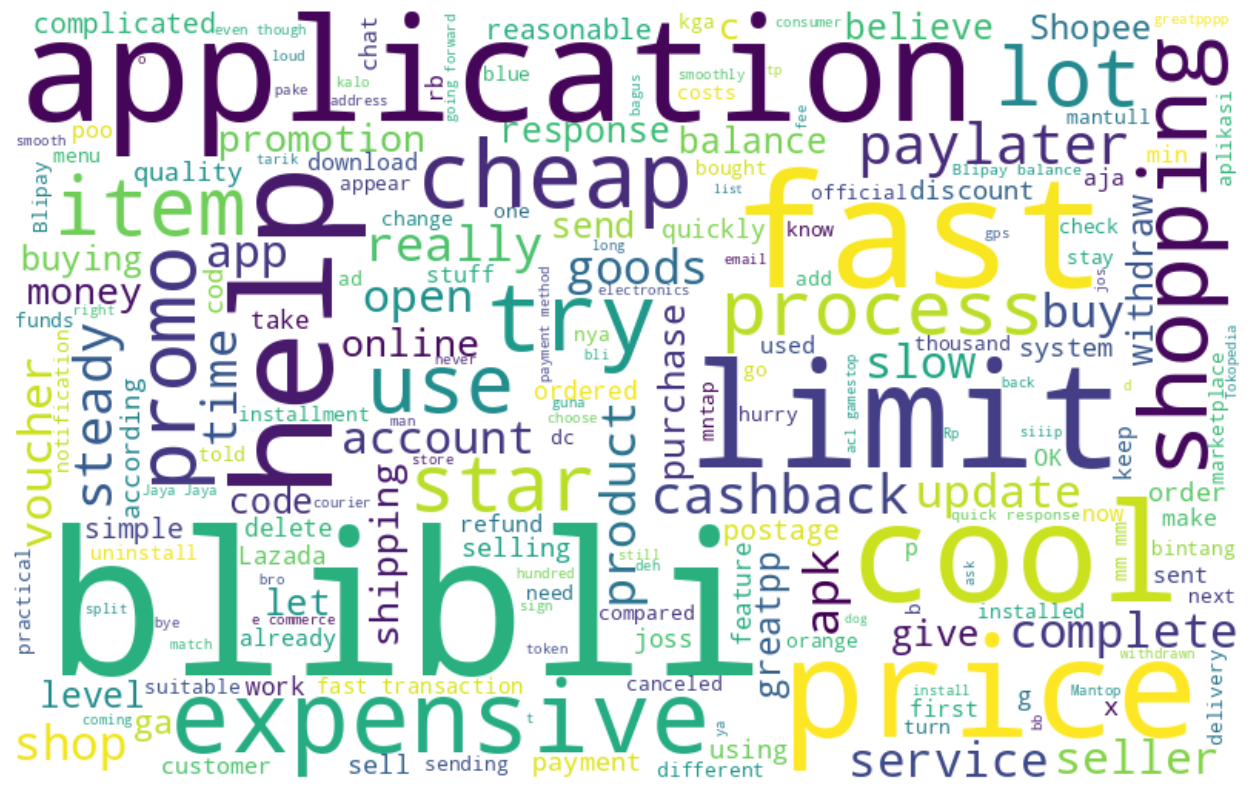

In [ ]:
df_p=df[df['Sentiments']== "Netral"]
all_words_lem = ' '.join([word for word in df_p['Ulasan']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');